In [4]:
import json
import pandas as pd
import time
import os
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np
import math
import scipy as sp
import matplotlib
import warnings
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names

pos_ret_raw = pd.read_csv('csvs02/returns_both/27681540pos_ret.csv')
neg_ret_raw = pd.read_csv('csvs02/returns_both/27681540neg_ret.csv')
ret_raw = pos_ret_raw.append(neg_ret_raw).sort_values(by=['t'])
pos_log = np.log(pos_ret_raw['ret']/pos_ret_raw['ret'].shift(1)).dropna()
neg_log = np.log(neg_ret_raw['ret']/neg_ret_raw['ret'].shift(1)).dropna()
ret_log = np.log(np.abs(ret_raw['ret']/ret_raw['ret'].shift(1))).dropna()

#### Stationarity
We can split our dataset and calculate the mean and variance for each group.

In [7]:
from statsmodels.tsa.stattools import adfuller

def print_adf(series):
    X = series.values
    result = adfuller(X)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
     print('\t%s: %.3f' % (key, value))

In [20]:
print_adf(ret_raw['ret'])

ADF Statistic: -14.762731
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


#### Autocorrelation:
The acf() function expects values to be in order by time and assumes equal spacing in time. 
How many lags?

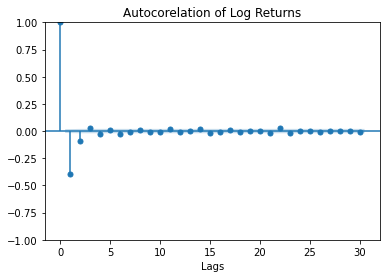

/home/karolina/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


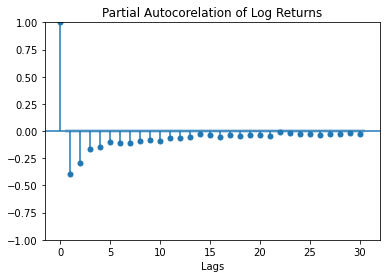

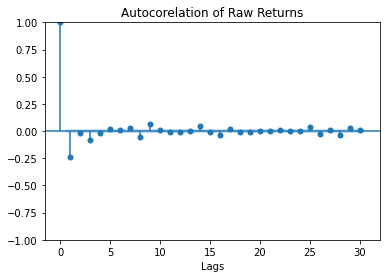

/home/karolina/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


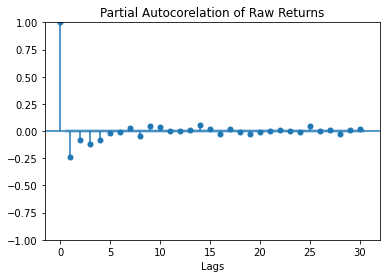

In [24]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plot_acf(x=ret_log, lags=30)
plt.xlabel("Lags")
plt.title("Autocorelation of Log Returns")
plt.show()

plot_pacf(x=ret_log, lags=30)
plt.xlabel("Lags")
plt.title("Partial Autocorelation of Log Returns")
plt.show()

plot_acf(x=ret_raw['ret'], lags=30)
plt.xlabel("Lags")
plt.title("Autocorelation of Raw Returns")
plt.show()

plot_pacf(x=ret_raw['ret'], lags=30)
plt.xlabel("Lags")
plt.title("Partial Autocorelation of Raw Returns")
plt.show()

Acf:[ 1.00000000e+00 -2.35602760e-01 -1.90166568e-02 -8.60734439e-02
 -2.09526274e-02  1.95370873e-02  6.36670072e-03  3.09030566e-02
 -5.88991998e-02  6.29261775e-02  5.64822607e-03 -7.56121763e-03
 -5.96265049e-03  8.56012968e-04  4.69345940e-02 -8.82606357e-03
 -3.41161484e-02  1.90339784e-02 -1.27058614e-02 -7.94761676e-03
  3.72075599e-03  1.47772065e-03  1.37033587e-02  3.30600284e-03
 -3.04377726e-03  3.63911909e-02 -2.36833383e-02  1.22600960e-02
 -3.86297082e-02  2.65388364e-02  7.60406645e-03]
Pacf:[ 1.00000000e+00 -2.35621330e-01 -7.89184120e-02 -1.16688406e-01
 -7.90628534e-02 -1.90227299e-02 -9.67515173e-03  2.39473518e-02
 -4.86696709e-02  4.42824772e-02  3.48852599e-02  3.14586599e-03
  2.30560258e-03  9.35529190e-03  5.38395108e-02  1.97144212e-02
 -3.14429395e-02  1.85980651e-02 -4.60236402e-03 -2.23813467e-02
 -7.44964912e-03 -3.59766897e-03  1.42674393e-02  5.25346755e-03
 -4.66232107e-03  4.95672750e-02 -9.97800534e-05  1.09755570e-02
 -2.94196546e-02  1.31366930e-0

<ipython-input-25-878f35bacc35>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-25-878f35bacc35>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


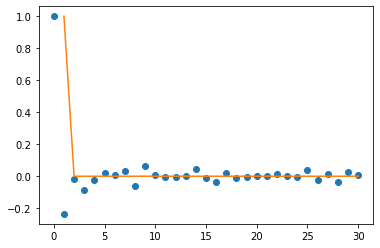

<ipython-input-25-878f35bacc35>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


[  1.         -36.89691703]



<ipython-input-25-878f35bacc35>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


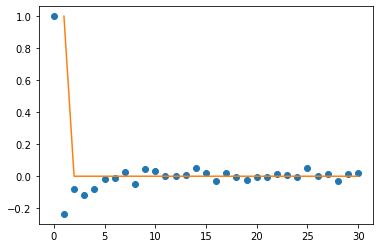

Acf:[ 1.00000000e+00 -3.97613263e-01 -8.83681068e-02  3.21029240e-02
 -2.98255307e-02  1.13249843e-02 -2.36954932e-02 -9.69762470e-03
  1.20313687e-02 -4.66880730e-03 -9.93259496e-03  1.88669365e-02
 -6.91784975e-03 -6.15068370e-04  1.73368785e-02 -1.55226543e-02
 -1.07328715e-02  1.32791162e-02 -9.83076335e-03  4.26741696e-03
  2.12091052e-03 -1.38200622e-02  3.04494660e-02 -1.71079429e-02
 -3.84937786e-03  4.50207495e-03 -9.29396483e-03  5.26201002e-03
 -1.46380803e-04  4.18045478e-03 -6.52434987e-03]
Pacf:[ 1.         -0.39764461 -0.29280139 -0.16857871 -0.1501881  -0.10167594
 -0.11071739 -0.11082111 -0.09005156 -0.08336413 -0.08928748 -0.06079095
 -0.05993418 -0.05460687 -0.02677114 -0.03613274 -0.05039776 -0.03563535
 -0.04344713 -0.03689728 -0.03170093 -0.04743119 -0.00930978 -0.02195871
 -0.02445985 -0.02398274 -0.03354941 -0.02943153 -0.02865606 -0.0191574
 -0.02729322]
[  1.         -34.21283342]



<ipython-input-25-878f35bacc35>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)
<ipython-input-25-878f35bacc35>:22: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x, b)


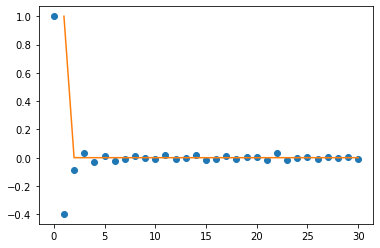

[-0.02211376  0.27690414]



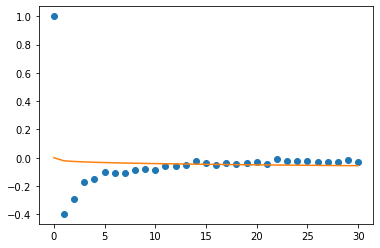

In [25]:
from statsmodels.tsa import stattools

def autocorr_stats(data, lags):
    data.corr(data.shift(1), method = 'pearson')

    autocorr = stattools.acf(data, nlags= lags)

    # Get autocorrelation coefficient at lag = 1
    autocorr_coeff = autocorr[1]
    print("Acf:" + str(autocorr))

    pautocorr = stattools.pacf(data, nlags= lags)
    pautocorr_coeff = pautocorr[1]
    print("Pacf:" + str(pautocorr))
    
    return autocorr, pautocorr


from scipy.optimize import curve_fit

def power_law(x, a, b):
    return a*np.power(x, b)

def fit_autocorr_func(data, lags, func):
    pars, cov = curve_fit(f=func, xdata=np.linspace(1, lags, data.size), ydata=data, p0=[0, 0], bounds=(-np.inf, np.inf))# Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
    stdevs = np.sqrt(np.diag(cov))# Calculate the residuals
    res = data - func(np.linspace(0, lags, data.size), *pars)
    print(str(pars) + '\n')
    plt.plot(np.linspace(0, lags, data.size), data, 'o', label='Data')
    plt.plot(np.linspace(0, lags, data.size), func(np.linspace(0, lags, data.size), *pars), '-', label='Fit')

    plt.show()

lags = 30

autocorr_abs, pautocorr_abs = autocorr_stats(ret_raw['ret'], lags)
fit_autocorr_func(autocorr_abs, lags, power_law)
fit_autocorr_func(pautocorr_abs, lags, power_law)

autocorr_pos, pautocorr_pos = autocorr_stats(ret_log, lags)
fit_autocorr_func(autocorr_pos, lags, power_law)
fit_autocorr_func(pautocorr_pos, lags, power_law)



Include estimating the tail index: https://www.bankofcanada.ca/wp-content/uploads/2019/08/swp2019-28.pdf
https://doi.org/10.1214/aos/1176346318


Ljung-Box test from https://www.kaggle.com/code/nholloway/volatility-clustering-and-garch
Not sure if it works

In [27]:
from statsmodels.stats.diagnostic import acorr_ljungbox

ljung_res = acorr_ljungbox(ret_raw['ret'], lags= 30, boxpierce=True)
print(ljung_res)

ljung_res = acorr_ljungbox(ret_log, lags= 30, boxpierce=True)
print(ljung_res)

        lb_stat      lb_pvalue      bp_stat      bp_pvalue
1    704.460422  3.204502e-155   704.293883  3.483174e-155
2    709.050271  1.075697e-154   708.882285  1.169951e-154
3    803.088119  9.257468e-174   802.883081  1.025558e-173
4    808.660945  1.021683e-173   808.453273  1.133184e-173
5    813.506600  1.384355e-173   813.296254  1.537288e-173
6    814.021231  1.438306e-172   813.810561  1.597252e-172
7    826.146857  4.222906e-174   825.927587  4.709098e-174
8    870.197710  1.512093e-182   869.943727  1.715342e-182
9    920.482020  2.387709e-192   920.184449  2.767628e-192
10   920.887181  2.033129e-191   920.589228  2.356697e-191
11   921.613324  1.397783e-190   921.314626  1.620574e-190
12   922.064921  1.047968e-189   921.765725  1.215107e-189
13   922.074229  9.346603e-189   921.775022  1.083558e-188
14   950.059352  8.048844e-194   949.724861  9.494056e-194
15   951.049066  4.147393e-193   950.713248  4.894431e-193
16   965.837753  2.301513e-195   965.480958  2.743907e-1

#### Long-term memory:

Hurst exponent

Hurst exponent with 30 lags: -0.0059
Hurst exponent with 30 lags: -0.0053


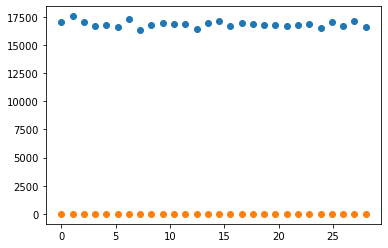

In [29]:
#import yfinance as yf
# rescaled range (R/S) analysis
def get_hurst_exponent(time_series, max_lag=20):
    
    lags = range(2, max_lag)

    # variances of the lagged differences
    tau = [np.std(np.subtract(time_series[lag:], time_series[:-lag])) for lag in lags]

    # calculate the slope of the log plot -> the Hurst Exponent
    reg = np.polyfit(np.log(lags), np.log(tau), 1)

    return tau, reg[0]

# for lag in [20, 100, 300, 500, 1000]:
    # tau, hurst_exp = get_hurst_exponent(pos_ret['ret'].values, lag)
    # print(f"Hurst exponent with {lag} lags: {hurst_exp:.4f}")
    # plt.plot(np.linspace(0, len(tau), len(tau)), tau, 'o', label='Data')
lag = 30
tau, hurst_exp = get_hurst_exponent(ret_raw['ret'].values, lag)
print(f"Hurst exponent with {lag} lags: {hurst_exp:.4f}")
plt.plot(np.linspace(0, len(tau), len(tau)), tau, 'o', label='Data')

lag = 30
tau, hurst_exp = get_hurst_exponent(ret_log.values, lag)
print(f"Hurst exponent with {lag} lags: {hurst_exp:.4f}")
plt.plot(np.linspace(0, len(tau), len(tau)), tau, 'o', label='Data')

In [34]:
Min = 8
Max = 2
fluc = np.full(10, np.nan)
scale = np.full(10, np.nan)
slope = np.nan

def ss(series, period):
    PI = 2.0 * np.arcsin(1.0)
    SQRT2 = np.sqrt(2.0)
    _lambda = PI * SQRT2 / period
    a1 = np.exp(-_lambda)
    coeff2 = 2.0 * a1 * np.cos(_lambda)
    coeff3 = - np.power(a1, 2.0)
    coeff1 = 1.0 - coeff2 - coeff3
    filt1 = np.zeros_like(series)
    
    for i in range(2, len(series)):
        filt1[i] = coeff1 * (series[i] + (series[i - 1] if i - 1 >= 0 else 0)) * 0.5 + coeff2 * filt1[i - 1] + coeff3 * filt1[i - 2]

    return filt1

def RMS(N1, N, csum):
    seq = np.arange(1, N + 1)
    y = csum[N1 : N1 + N]
    sdx = np.std(seq) * np.sqrt(N / (N - 1))
    sdy = np.std(y) * np.sqrt(N / (N - 1))
    cov = np.cov(seq, y, bias=True)[0, 1] * (N / (N - 1))
    r2 = np.power(cov / (sdx * sdy), 2)
    rms = np.sqrt(1 - r2) * sdy
    return rms

def Arms(bar, csum, barsize):
    num = np.floor(barsize / bar).astype(int)
    sumr = sum(RMS(i * bar, bar, csum) for i in range(num))
    avg = np.log10(sumr / num)
    return avg

def fs(x, barsize, Min, Max):
    return np.round(Min * np.power(np.power(barsize / (Max * Min), 0.1111111111), x)).astype(int)

def hurst_exponent(close, barsize=100, slen=18, Min=8, Max=2):
    # Calculate Log Return
    r = np.log(close / np.roll(close, 1))
    # Mean of Log Return
    mean = np.convolve(r, np.ones(barsize) / barsize, mode="valid")
    mean = np.pad(mean, (barsize - 1, 0), 'constant', constant_values=0)

    # Calculate Cumulative Sum
    csum = np.cumsum(r - mean)

    # Set Ten Points of Root Mean Square Average along the Y log axis
    fluc = np.array([Arms(fs(i, barsize, Min, Max), csum, barsize) for i in range(10)])

    # Set Ten Points of data scale along the X log axis
    scale = np.array([np.log10(fs(i, barsize, Min, Max)) for i in range(10)])

        # Calculate Slope Measured From RMS and Scale on Log log plot using linear regression
    slopes = np.array([np.cov(scale, fluc, bias=True)[0, 1] / np.var(scale, ddof=0) for i in range(len(close) - barsize + 1)])

    # Calculate Moving Average Smoothed Hurst Exponent
    smooth = ss(slopes, slen)

    # Calculate Critical Value based on Confidence Interval (95% Confidence)
    ci = 1.645 * (0.3912 / np.power(barsize, 0.3))
    # Calculate Expected Value plus Critical Value
    cu = 0.5 + ci
    cd = 0.5 - ci

    return slopes, smooth, cu, cd

# (e) - Plots
def plot_hurst_exponent(close, barsize=100, slen=18, Min=8, Max=2):
    slopes, smooth, cu, cd = hurst_exponent(close, barsize, slen, Min, Max)

    # Color of HE
    c = "green" if slopes[-1] > cu else "blue" if slopes[-1] >= 0.5 else "red" if slopes[-1] < cd else "orange" if slopes[-1] < 0.5 else "black"

    # Text of Table
    text = "Significant Trend" if slopes[-1] > cu else "Trend" if slopes[-1] >= 0.5 else "Significant Mean Reversion" if slopes[-1] < cd else "Mean Reversion" if slopes[-1] < 0.5 else "N/A"

    
    print(f"Hurst Exponent: {slopes[-1]:.3f}")
    print(f"Smoothed Hurst Exponent: {smooth[-1]:.3f}")
    



data = np.abs(ret_raw['ret'])
# Use the 'Close' column for Hurst Exponent calculation
#close_prices = data['Close'].values
plot_hurst_exponent(data.values)

data = np.abs(ret_log)
# Use the 'Close' column for Hurst Exponent calculation
#close_prices = data['Close'].values
plot_hurst_exponent(data.values)

Hurst Exponent: 0.298
Smoothed Hurst Exponent: 0.298


<ipython-input-34-39857530e830>:46: RuntimeWarning: divide by zero encountered in true_divide
  r = np.log(close / np.roll(close, 1))
<ipython-input-34-39857530e830>:46: RuntimeWarning: divide by zero encountered in log
  r = np.log(close / np.roll(close, 1))
<ipython-input-34-39857530e830>:52: RuntimeWarning: invalid value encountered in subtract
  csum = np.cumsum(r - mean)


Hurst Exponent: 0.020
Smoothed Hurst Exponent: 0.020
